# DEPRECATED

This deprecated script once had the purpose of testing perspective changes with the OpenCV lib. However, the current results show that there is no need to change the perspective of the image. The script is kept here for reference.

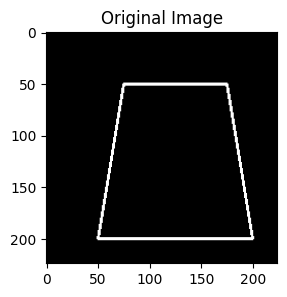

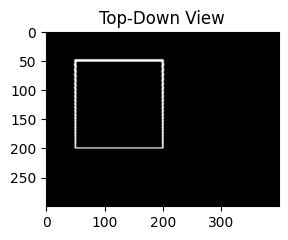

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample image of a rectangle (perspective view)
image = np.zeros((224, 224, 3), dtype=np.uint8)

# Define the coordinates of the four corners of the rectangle
rectangle_pts = np.array([[75, 50], [175, 50], [200, 200], [50, 200]], dtype=np.float32)

# Draw the rectangle on the image
cv2.polylines(image, [rectangle_pts.astype(np.int32)], isClosed=True, color=(255, 255, 255), thickness=2)

# Display the original image
plt.figure(figsize=(3, 3))
plt.imshow(image)
plt.title("Original Image")
plt.show()

# Define the coordinates for the top-down view of the rectangle
top_down_pts = np.array([[50, 50], [200, 50], [200, 200], [50, 200]], dtype=np.float32)

# Calculate the homography matrix
homography_matrix, _ = cv2.findHomography(rectangle_pts, top_down_pts)

# Apply the homography transformation to get the top-down view
top_down_image = cv2.warpPerspective(image, homography_matrix, (400, 300))

# Display the top-down view image
plt.figure(figsize=(3, 3))
plt.imshow(top_down_image)
plt.title("Top-Down View")
plt.show()

width: 72 height: 83
[[ 9.09696753e-01 -4.53175060e-01  2.84742022e+01]
 [ 2.00619237e-02  2.19183670e-02  7.87007750e+01]
 [ 1.09930771e-03 -3.60154975e-03  1.00000000e+00]]


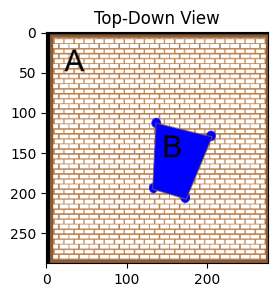

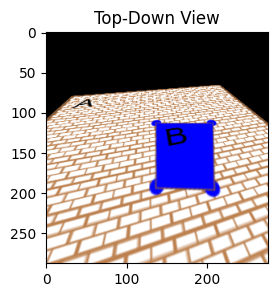

: 

In [5]:
import numpy as np
import cv2
import math

# read input
img = cv2.imread("red_quadrilateral.png")
hh, ww = img.shape[:2]

# specify input coordinates for corners of red quadrilateral in order TL, TR, BR, BL as x,
input = np.float32([[136,113], [206,130], [173,207], [132,196]])

# get top and left dimensions and set to output dimensions of red rectangle
width = round(math.hypot(input[0,0]-input[1,0], input[0,1]-input[1,1]))
height = round(math.hypot(input[0,0]-input[3,0], input[0,1]-input[3,1]))
print("width:",width, "height:",height)

# set upper left coordinates for output rectangle
x = input[0,0]
y = input[0,1]

# specify output coordinates for corners of red quadrilateral in order TL, TR, BR, BL as x,
output = np.float32([[x,y], [x+width-1,y], [x+width-1,y+height-1], [x,y+height-1]])

# compute perspective matrix
matrix = cv2.getPerspectiveTransform(input,output)
print(matrix)

# do perspective transformation setting area outside input to black
# Note that output size is the same as the input image size
imgOutput = cv2.warpPerspective(img, matrix, (ww,hh), cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

# show the original
plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.title("Top-Down View")
plt.show()

# show the result
plt.figure(figsize=(3, 3))
plt.imshow(imgOutput)
plt.title("Top-Down View")
plt.show()
